In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

PATH_TO_DATA = '../data/'
PATH_TO_OUTPUT_DATA = '../output-data/'
hitting_df = pd.read_csv(PATH_TO_OUTPUT_DATA + 'COV_AGGREGATE.csv')
game_df = pd.read_csv(PATH_TO_OUTPUT_DATA + 'GAME_LEVEL.csv')

def convert_team_ids(team):
    if (team == 'LAA'):
        return 'ANA' # matches up with previous table
    if (team == 'FLO'):
        return 'MIA' # matches up with previous table
    if (team == 'MON'):
        return 'WAS' # matches up with previous table
    return team

hitting_df['team'] = hitting_df['team'].apply(convert_team_ids)
batting_df_test = hitting_df.copy()

In [471]:
pitching_df = pd.read_csv(PATH_TO_DATA + 'pitchers/Pitching.csv')
players_df = pd.read_csv(PATH_TO_DATA + 'pitchers/People.csv')[['playerID', 'retroID', 'bbrefID']]

In [480]:
pitching_df = pitching_df[pitching_df.yearID >= 2001] # don't need earlier data

def convert_team_ids(team):
    if (team == 'LAA'):
        return 'ANA' # matches up with previous table
    if (team == 'FLO'):
        return 'MIA' # matches up with previous table
    if (team == 'MON'):
        return 'WAS' # matches up with previous table
    return team

pitching_df.teamID = pitching_df.teamID.apply(convert_team_ids)

Brief examine to consider starting pitcher stats

In [481]:
starters_df = []
for i in [8, 10, 12, 15, 20, 25]:
    if (len(starters_df) == 0):
        starters_df = pitching_df[pitching_df.GS > i].groupby('yearID')['playerID'].count().rename(i).to_frame()
    else:
        starters_df = pd.concat([starters_df,
            pitching_df[pitching_df.GS > i].groupby('yearID')['playerID'].count().rename(i).to_frame()], axis = 1)

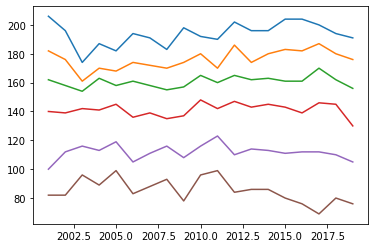

In [482]:
# Set starter = 12 starts per year
plt.plot(starters_df)

In [483]:
# starting pitchers
starters_df = pitching_df[pitching_df.GS > 12] # starting pitchers

In [484]:
starters_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
33581,abbotpa01,2001,1,SEA,AL,17,4,28,27,1,...,5.0,11,7.0,0,710.0,0,79,3.0,5.0,11.0
33582,acevejo01,2001,1,CIN,NL,5,7,18,18,0,...,2.0,4,3.0,0,417.0,0,61,6.0,3.0,6.0
33585,adamste01,2001,1,LAN,NL,12,8,43,22,0,...,1.0,7,3.0,2,708.0,10,84,6.0,0.0,17.0
33590,anderbr02,2001,1,ARI,NL,4,9,29,22,1,...,2.0,2,1.0,1,571.0,1,93,7.0,4.0,14.0
33591,anderji02,2001,1,PIT,NL,9,17,34,34,1,...,14.0,6,11.0,1,922.0,0,123,11.0,9.0,29.0


In [485]:
players_df.head()

,playerID,retroID,bbrefID
0,aardsda01,aardd001,aardsda01
1,aaronha01,aaroh101,aaronha01
2,aaronto01,aarot101,aaronto01
3,aasedo01,aased001,aasedo01
4,abadan01,abada001,abadan01


In [528]:
print(starters_df.columns)
starters_df['WHIP'] = (starters_df['H'] + starters_df['BB'] + starters_df['HBP'] )/starters_df['IPouts']*3
starters_df['IP_Start'] = (starters_df['IPouts'])/starters_df['GS']/3
starters_df['HR9'] = (starters_df['HR'])/starters_df['IPouts']*27
starters_df['K9'] = (starters_df['SO'])/starters_df['IPouts']*27
starters_df['K/BB'] = (starters_df['SO'])/starters_df['BB']

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'WHIP', 'IP_Start', 'HR9', 'K9'],
      dtype='object')


<ipython-input-528-3a08d40f4a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starters_df['WHIP'] = (starters_df['H'] + starters_df['BB'] + starters_df['HBP'] )/starters_df['IPouts']*3
<ipython-input-528-3a08d40f4a13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starters_df['IP_Start'] = (starters_df['IPouts'])/starters_df['GS']/3
<ipython-input-528-3a08d40f4a13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [529]:
starters_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,GF,R,SH,SF,GIDP,WHIP,IP_Start,HR9,K9,K/BB
33581,abbotpa01,2001,1,SEA,AL,17,4,28,27,1,...,0,79,3.0,5.0,11.0,1.466258,6.037037,1.159509,6.515337,1.356322
33582,acevejo01,2001,1,CIN,NL,5,7,18,18,0,...,0,61,6.0,3.0,6.0,1.437500,5.333333,1.593750,6.375000,2.000000
33585,adamste01,2001,1,LAN,NL,12,8,43,22,0,...,10,84,6.0,0.0,17.0,1.376754,7.560606,0.486974,7.629259,2.611111
33590,anderbr02,2001,1,ARI,NL,4,9,29,22,1,...,1,93,7.0,4.0,14.0,1.402500,6.060606,1.687500,3.712500,1.833333
33591,anderji02,2001,1,PIT,NL,9,17,34,34,1,...,0,123,11.0,9.0,29.0,1.579968,6.068627,0.654281,3.882068,1.072289


In [530]:
PITCHERS = starters_df.merge(players_df)[['retroID', 'yearID', 'teamID', 
                               'W', 'L', 'G', 'GS', 'IPouts', 'IP_Start',
                               'SO', 'BAOpp', 'ERA', 'WHIP', 'K9', 'HR9', 'K/BB']].rename({
    'yearID': 'Y',
    'teamID': 'team',
    'IPouts': 'IP',
    'BAOpp': 'BAA'
}, axis = 1)
PITCHERS['IP'] = PITCHERS['IP']/3

In [531]:
starters_df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'WHIP', 'IP_Start', 'HR9', 'K9', 'K/BB'],
      dtype='object')

In [534]:
PITCHERS.to_csv(PATH_TO_OUTPUT_DATA + 'STARTING_PITCHERS.csv', index = False)

### Computing covariate priors

Determining each new season as the prior from the previous season

In [193]:
batting_df_test

,team,date,AB,RS,H,HR,TB,BB,SF
0,ANA,20000403,35,2,10,1,14,5,0
1,ANA,20000404,36,3,10,0,10,6,0
2,ANA,20000405,33,12,12,1,19,9,2
3,ANA,20000407,32,7,9,2,17,5,0
4,ANA,20000408,35,7,13,1,20,1,0
...,...,...,...,...,...,...,...,...,...
96140,WAS,20190925,33,3,8,2,15,1,0
96141,WAS,20190926,34,5,9,2,18,7,0
96142,WAS,20190927,34,6,11,2,20,4,0
96143,WAS,20190928,34,7,11,1,17,6,0


In [255]:
batting_df_test.reset_index(drop = True, inplace = True)
batting_df_test = batting_df_test.set_index('team')
batting_df_test['Y'] = batting_df_test.date.apply(lambda x: round(x/10000))
grouped_batting = batting_df_test.groupby(['team', 'Y']).sum()
avgs = grouped_batting['H']/grouped_batting['AB']

avg_reset = avgs.reset_index(level = 1).rename({0: 'VALUE'}, axis = 1)
avg_reset.head()

,Y,VALUE
team,,
ANA,2000,0.277406
ANA,2001,0.258070
ANA,2002,0.279707
ANA,2003,0.263318
ANA,2004,0.276666


In [256]:
def create_prior_variables(avg_reset):
    TABLE = pd.DataFrame(columns = ['Y'] + sorted(list(set(batting_df_test.index))))

    avg_year = {}
    for year in range(2001, 2020):
        avg_year['Y'] = year
        for team in sorted(list(set(batting_df_test.index))):
            # Find PREVIOUS YEAR
            avg_year[team] = avg_reset[avg_reset.Y == (year - 1)].loc[team, 'VALUE']
        TABLE = pd.concat([TABLE, pd.DataFrame(avg_year, index = [0])])

    return TABLE.set_index('Y')

TEAM_BATTING_AVG = create_prior_variables(avg_reset)


obp = ((grouped_batting['H'] + grouped_batting['BB'])/(
    grouped_batting['AB'] + grouped_batting['BB'] + grouped_batting['SF'])).reset_index(
    level = 1).rename({0: 'VALUE'}, axis = 1)
TEAM_BATTING_OBP = create_prior_variables(obp)

slg = ((grouped_batting['TB'])/(
    grouped_batting['AB'])).reset_index(
    level = 1).rename({0: 'VALUE'}, axis = 1)
TEAM_BATTING_SLG = create_prior_variables(slg)

In [257]:
TEAM_BATTING_AVG.to_csv(PATH_TO_OUTPUT_DATA + 'covariates/TEAM_AVG_PRIORS.csv')
TEAM_BATTING_OBP.to_csv(PATH_TO_OUTPUT_DATA + 'covariates/TEAM_OBP_PRIORS.csv')
TEAM_BATTING_SLG.to_csv(PATH_TO_OUTPUT_DATA + 'covariates/TEAM_SLG_PRIORS.csv')

### Computing input covariates

In [399]:
TEAM_BATTING_AVG = pd.read_csv(PATH_TO_OUTPUT_DATA + 'covariates/TEAM_AVG_PRIORS.csv').set_index('Y')
TEAM_BATTING_OBP = pd.read_csv(PATH_TO_OUTPUT_DATA + 'covariates/TEAM_OBP_PRIORS.csv').set_index('Y')
TEAM_BATTING_SLG = pd.read_csv(PATH_TO_OUTPUT_DATA + 'covariates/TEAM_SLG_PRIORS.csv').set_index('Y')

In [400]:
TEAM_BATTING_AVG.head()

,ANA,ARI,ATL,BAL,BOS,CHA,CHN,CIN,CLE,COL,...,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
Y,,,,,,,,,,,,,,,,,,,,,
2001,0.277406,0.263385,0.268227,0.269526,0.265407,0.283532,0.254189,0.272199,0.285689,0.290176,...,0.249414,0.264954,0.251828,0.267280,0.276079,0.267825,0.255143,0.281519,0.273459,0.264347
2002,0.258070,0.264988,0.258724,0.245706,0.264248,0.264318,0.258674,0.259122,0.275783,0.288365,...,0.257843,0.244632,0.249187,0.285490,0.264248,0.267201,0.255743,0.273219,0.260140,0.250414
2003,0.279707,0.264542,0.258134,0.243740,0.273876,0.265538,0.243687,0.250724,0.246753,0.270931,...,0.256148,0.242080,0.250404,0.271839,0.264584,0.265622,0.250442,0.267493,0.258937,0.258858
2004,0.263318,0.258913,0.278586,0.262556,0.285788,0.259472,0.253633,0.239184,0.248987,0.261782,...,0.256783,0.261250,0.256087,0.267471,0.258621,0.272273,0.261043,0.262781,0.276678,0.253155
2005,0.276666,0.248669,0.265360,0.275726,0.278680,0.262775,0.262170,0.245902,0.268531,0.267517,...,0.261975,0.254821,0.268349,0.264746,0.264001,0.271783,0.253536,0.262537,0.256740,0.242732


In [401]:
AVG_COV_DF = pd.DataFrame(columns = ['date'] + sorted(list(set(batting_df_test.index)))).set_index('date')
OBP_COV_DF = pd.DataFrame(columns = ['date'] + sorted(list(set(batting_df_test.index)))).set_index('date')
SLG_COV_DF = pd.DataFrame(columns = ['date'] + sorted(list(set(batting_df_test.index)))).set_index('date')

In [402]:
dates = sorted(list(set(batting_df_test[batting_df_test.Y >= 2001]['date'])))
for i in range(len(dates)):
    AVG_COV_DF.loc[dates[i]] = 0
    OBP_COV_DF.loc[dates[i]] = 0
    SLG_COV_DF.loc[dates[i]] = 0

In [403]:
import time

In [404]:
start = time.time()
for year in range(2001, 2020):
    year_start = time.time()
    INPUT_DATA = batting_df_test[batting_df_test.Y == year]
    dates = sorted(list(set(INPUT_DATA['date']))) # dates for each year

    for team in sorted(list(set(INPUT_DATA.index))):
        prior_avg = TEAM_BATTING_AVG.loc[year, team]
        prior_obp = TEAM_BATTING_OBP.loc[year, team]
        prior_slg = TEAM_BATTING_SLG.loc[year, team]

        # finds data only for that specific team
        ROLLING_DATA = INPUT_DATA.loc[team].set_index('date').rolling(7).sum()
        ROLLING_DATA['AVG'] = ROLLING_DATA['H']/ROLLING_DATA['AB']
        ROLLING_DATA['OBP'] = (ROLLING_DATA['H'] + ROLLING_DATA['BB'])/(
            ROLLING_DATA['AB'] + ROLLING_DATA['BB'] + ROLLING_DATA['SF'])
        ROLLING_DATA['SLG'] = ROLLING_DATA['TB']/ROLLING_DATA['AB']

        # iterates over all dfs
        for i in range(len(dates)):
            if (i < 7):
                # set first 7 days to be the last year's average
                AVG_COV_DF.loc[dates[i]][team] = prior_avg
                OBP_COV_DF.loc[dates[i]][team] = prior_obp
                SLG_COV_DF.loc[dates[i]][team] = prior_slg
            else:
                # try setting to rolling average or previous day
                try:
                    if (ROLLING_DATA.loc[dates[i]]['AVG'] != ROLLING_DATA.loc[dates[i]]['AVG']):
                        # replace nulls
                        AVG_COV_DF.loc[dates[i]][team] = prior_avg
                        OBP_COV_DF.loc[dates[i]][team] = prior_obp
                        SLG_COV_DF.loc[dates[i]][team] = prior_slg
                    else:
                        AVG_COV_DF.loc[dates[i]][team] = ROLLING_DATA.loc[dates[i]]['AVG']
                        OBP_COV_DF.loc[dates[i]][team] = ROLLING_DATA.loc[dates[i]]['OBP']
                        SLG_COV_DF.loc[dates[i]][team] = ROLLING_DATA.loc[dates[i]]['SLG']

                        prior_avg = ROLLING_DATA.loc[dates[i]]['AVG']
                        prior_obp = ROLLING_DATA.loc[dates[i]]['OBP']
                        prior_slg = ROLLING_DATA.loc[dates[i]]['SLG']
                except:
                    # set the prior avg
                    AVG_COV_DF.loc[dates[i]][team] = prior_avg
                    OBP_COV_DF.loc[dates[i]][team] = prior_obp
                    SLG_COV_DF.loc[dates[i]][team] = prior_slg
    year_end = time.time()
    print('year ' + str(year) + ' took: ' + str(round((year_end - year_start)*1000)/1000))

year 2001 took: 5.669
year 2002 took: 6.151
year 2003 took: 5.695
year 2004 took: 5.653
year 2005 took: 5.962
year 2006 took: 5.998
year 2007 took: 5.513
year 2008 took: 5.48
year 2009 took: 5.468
year 2010 took: 6.424
year 2011 took: 5.703
year 2012 took: 5.42
year 2013 took: 5.994
year 2014 took: 5.413
year 2015 took: 5.599
year 2016 took: 5.913
year 2017 took: 5.809
year 2018 took: 5.99
year 2019 took: 5.819


In [405]:
# EXPORT
AVG_COV_DF.to_csv(PATH_TO_OUTPUT_DATA + 'covariates/COVARIATE_AVG.csv')
OBP_COV_DF.to_csv(PATH_TO_OUTPUT_DATA + 'covariates/COVARIATE_OBP.csv')
SLG_COV_DF.to_csv(PATH_TO_OUTPUT_DATA + 'covariates/COVARIATE_SLG.csv')

### Why we use covariate AVGs and rolling #'s
Now we want to combine pitcher data with our game-levels
Note that we only included the rolling stats because individual game-to-game predictions have too much variance

Rollign #'s hits don't mean anything...

0.10146878451798538
0.10367851373738675


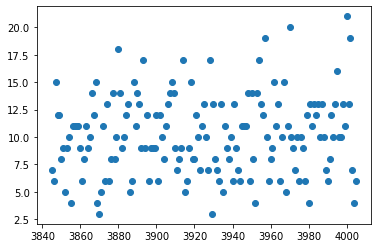

In [406]:
# see variance of Mariners in 2001
check_df = batting_df_test[batting_df_test.Y == 2001].reset_index()
plt.scatter(check_df[check_df.team == 'SEA'].index, check_df[check_df.team == 'SEA'].H)
print(np.corrcoef(check_df[check_df.team == 'SEA'].index, check_df[check_df.team == 'SEA'].H)[0][1])
print(np.corrcoef(check_df[check_df.team == 'SEA'].date, check_df[check_df.team == 'SEA'].H)[0][1])

0.10317275979347197


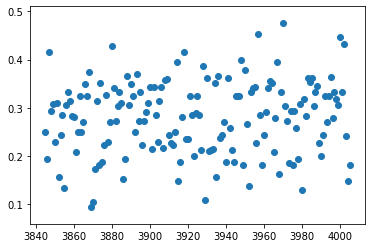

In [407]:
plt.scatter(check_df[check_df.team == 'SEA'].index, 
            check_df[check_df.team == 'SEA'].H/check_df[check_df.team == 'SEA'].AB)
print(np.corrcoef(check_df[check_df.team == 'SEA'].index, 
                  check_df[check_df.team == 'SEA'].H/check_df[check_df.team == 'SEA'].AB)[0][1])

0.06780499642699063

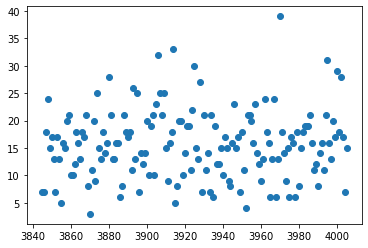

In [408]:
plt.scatter(check_df[check_df.team == 'SEA'].index, check_df[check_df.team == 'SEA'].TB)
import numpy as np
np.corrcoef(check_df[check_df.team == 'SEA'].index, check_df[check_df.team == 'SEA'].TB)[0][1]

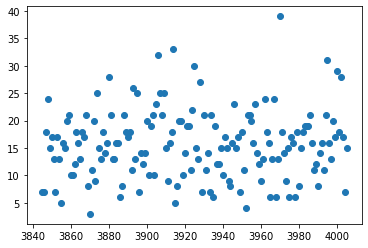

In [409]:
plt.scatter(check_df[check_df.team == 'SEA'].index, check_df[check_df.team == 'SEA'].TB)

0.3911805582664684


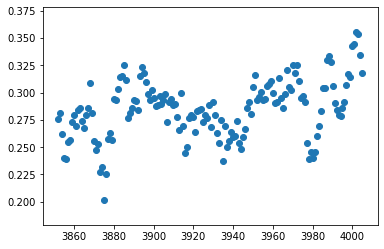

In [410]:
# However when we use a 7 day we get up to .39 R
plt.scatter(check_df[check_df.team == 'SEA'].index[7:], 
            (check_df[check_df.team == 'SEA'].H.rolling(7).sum()/check_df[
                      check_df.team == 'SEA'].AB.rolling(7).sum()).reset_index(drop = True)[7:])
print(np.corrcoef(check_df[check_df.team == 'SEA'].index[7:], 
                  (check_df[check_df.team == 'SEA'].H.rolling(7).sum()/check_df[
                      check_df.team == 'SEA'].AB.rolling(7).sum()).reset_index(drop = True)[7:])[0][1])

-0.040580986310728484


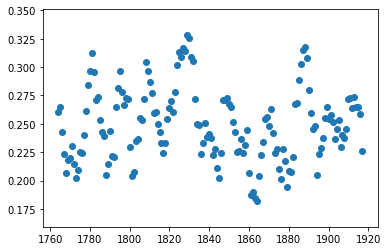

In [411]:
# Not always right...
check_df = batting_df_test[batting_df_test.Y == 2018].reset_index()
plt.scatter(check_df[check_df.team == 'HOU'].index[7:], 
            (check_df[check_df.team == 'HOU'].H.rolling(7).sum()/check_df[
                      check_df.team == 'HOU'].AB.rolling(7).sum()).reset_index(drop = True)[7:])
print(np.corrcoef(check_df[check_df.team == 'HOU'].index[7:], 
                  (check_df[check_df.team == 'HOU'].H.rolling(7).sum()/check_df[
                      check_df.team == 'HOU'].AB.rolling(7).sum()).reset_index(drop = True)[7:])[0][1])

-0.052403969183252776


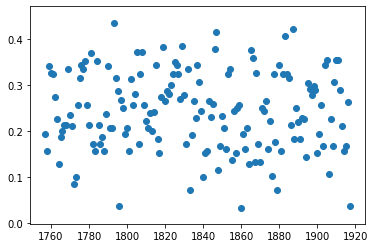

In [412]:
# Not always right...
check_df = batting_df_test[batting_df_test.Y == 2018].reset_index()
plt.scatter(check_df[check_df.team == 'HOU'].index[0:], 
            (check_df[check_df.team == 'HOU'].H.rolling(1).sum()/check_df[
                      check_df.team == 'HOU'].AB.rolling(1).sum()).reset_index(drop = True)[0:])
print(np.corrcoef(check_df[check_df.team == 'HOU'].index[0:], 
                  (check_df[check_df.team == 'HOU'].H.rolling(1).sum()/check_df[
                      check_df.team == 'HOU'].AB.rolling(1).sum()).reset_index(drop = True)[0:])[0][1])

In [414]:
check_df.head()

,team,date,AB,RS,H,HR,TB,BB,SF,Y
0,ANA,20180329,46,4,13,3,26,1,0,2018
1,ANA,20180330,32,2,6,1,9,0,0,2018
2,ANA,20180331,41,7,12,0,20,2,0,2018
3,ANA,20180401,38,6,13,0,17,2,0,2018
4,ANA,20180402,34,0,6,0,7,4,0,2018


### Integrating pitchers
Time to integrate pitchers??

In [415]:
AVG_COV_DF = pd.read_csv(PATH_TO_OUTPUT_DATA + 'covariates/COVARIATE_AVG.csv').set_index('date')
OBP_COV_DF= pd.read_csv(PATH_TO_OUTPUT_DATA + 'covariates/COVARIATE_OBP.csv').set_index('date')
SLG_COV_DF= pd.read_csv(PATH_TO_OUTPUT_DATA + 'covariates/COVARIATE_SLG.csv').set_index('date')

In [416]:
AVG_COV_DF

,ANA,ARI,ATL,BAL,BOS,CHA,CHN,CIN,CLE,COL,...,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
date,,,,,,,,,,,,,,,,,,,,,
20010401,0.277406,0.263385,0.268227,0.269526,0.265407,0.283532,0.254189,0.272199,0.285689,0.290176,...,0.249414,0.264954,0.251828,0.267280,0.276079,0.267825,0.255143,0.281519,0.273459,0.264347
20010402,0.277406,0.263385,0.268227,0.269526,0.265407,0.283532,0.254189,0.272199,0.285689,0.290176,...,0.249414,0.264954,0.251828,0.267280,0.276079,0.267825,0.255143,0.281519,0.273459,0.264347
20010403,0.277406,0.263385,0.268227,0.269526,0.265407,0.283532,0.254189,0.272199,0.285689,0.290176,...,0.249414,0.264954,0.251828,0.267280,0.276079,0.267825,0.255143,0.281519,0.273459,0.264347
20010404,0.277406,0.263385,0.268227,0.269526,0.265407,0.283532,0.254189,0.272199,0.285689,0.290176,...,0.249414,0.264954,0.251828,0.267280,0.276079,0.267825,0.255143,0.281519,0.273459,0.264347
20010405,0.277406,0.263385,0.268227,0.269526,0.265407,0.283532,0.254189,0.272199,0.285689,0.290176,...,0.249414,0.264954,0.251828,0.267280,0.276079,0.267825,0.255143,0.281519,0.273459,0.264347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190925,0.244813,0.228571,0.238298,0.236364,0.261029,0.333333,0.219008,0.216667,0.248963,0.232210,...,0.211111,0.214876,0.185345,0.190476,0.214815,0.231579,0.250000,0.238298,0.221344,0.258303
20190926,0.225806,0.228571,0.238298,0.236364,0.261029,0.327138,0.227273,0.223140,0.235043,0.234432,...,0.200000,0.248000,0.165939,0.180723,0.211538,0.231579,0.250000,0.242553,0.221344,0.259259
20190927,0.220408,0.219424,0.252101,0.230769,0.266160,0.327138,0.242798,0.214286,0.200873,0.237918,...,0.199301,0.252066,0.173160,0.168067,0.212928,0.226148,0.243028,0.253112,0.200803,0.273063


In [443]:
drop_labels = ['home_' + str(x) + '_id' for x in range(1, 10)] + ['away_' + str(x) + '_id' for x in range(1, 10)]

game_df_new = game_df.drop(columns = drop_labels, axis = 1)

In [444]:
game_df_new['home_AVG'] = 0
game_df_new['home_OBP'] = 0
game_df_new['home_SLG'] = 0

game_df_new['away_AVG'] = 0
game_df_new['away_OBP'] = 0
game_df_new['away_SLG'] = 0

In [445]:
# format date column
game_df_new['date'] = game_df_new.dt.apply(lambda x: int(x.split('-')[0] + x.split('-')[1] + x.split('-')[2]))

In [450]:
def get_covariates(x):
    x['home_AVG'] = AVG_COV_DF.loc[x['date']][x['home_team']]
    x['away_AVG'] = AVG_COV_DF.loc[x['date']][x['away_team']]
    x['home_OBP'] = OBP_COV_DF.loc[x['date']][x['home_team']]
    x['away_OBP'] = OBP_COV_DF.loc[x['date']][x['away_team']]
    x['home_SLG'] = SLG_COV_DF.loc[x['date']][x['home_team']]
    x['away_SLG'] = SLG_COV_DF.loc[x['date']][x['away_team']]
    return(x)
post_2001_games = game_df_new[game_df_new.Y >= 2001].apply(get_covariates, axis = 1)

In [458]:
# > 0 = home is better
post_2001_games['AVG_difference'] = (post_2001_games['home_AVG'] - post_2001_games['away_AVG'])*1000
post_2001_games['OBP_difference'] = (post_2001_games['home_OBP'] - post_2001_games['away_OBP'])*1000
post_2001_games['SLG_difference'] = (post_2001_games['home_SLG'] - post_2001_games['away_SLG'])*1000

# scaling doesn't matter for many cases
post_2001_games['AVG_difference_PCT'] = (post_2001_games['home_AVG'] - post_2001_games['away_AVG'])/(
    post_2001_games['home_AVG']
)*100
post_2001_games['OBP_difference_PCT'] = (post_2001_games['home_OBP'] - post_2001_games['away_OBP'])/(
    post_2001_games['home_OBP']
)*100
post_2001_games['SLG_difference_PCT'] = (post_2001_games['home_SLG'] - post_2001_games['away_SLG'])/(
    post_2001_games['home_SLG']
)*100

In [459]:
post_2001_games

,dt,Y,M,D,away_team,home_team,away_pitcher_id,home_pitcher_id,outcome,home_AVG,...,away_AVG,away_OBP,away_SLG,date,AVG_difference,OBP_difference,SLG_difference,AVG_difference_PCT,OBP_difference_PCT,SLG_difference_PCT
2428,2001-04-01,2001,4,1,TEX,TOR,hellr001,loaie001,1,0.273459,...,0.281519,0.349386,0.443116,20010401,-8.059871,-10.103320,23.270676,-2.947374,-2.977845,4.989568
2429,2001-04-02,2001,4,2,SLN,COL,kiled001,hampm001,1,0.290176,...,0.267825,0.353322,0.450778,20010402,22.351406,4.164662,-2.514311,7.702701,1.164985,-0.560900
2430,2001-04-02,2001,4,2,SDN,SFN,willw001,hernl003,1,0.276079,...,0.251828,0.327088,0.398252,20010402,24.251065,32.291929,70.272995,8.784099,8.985458,14.998766
2431,2001-04-02,2001,4,2,MIL,LAN,wrigj001,parkc002,1,0.254198,...,0.243537,0.322708,0.400071,20010402,10.660336,14.276221,26.359450,4.193722,4.236467,6.181414
2432,2001-04-02,2001,4,2,ATL,CIN,burkj001,harnp001,0,0.272199,...,0.268227,0.342770,0.423582,20010402,3.971909,-1.728942,20.216091,1.459194,-0.506960,4.555242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48551,2019-09-29,2019,9,29,ATL,NYN,sorom001,syndn001,1,0.256098,...,0.237903,0.325000,0.395161,20190929,18.194335,11.956522,47.928141,7.104455,3.548387,10.816810
48552,2019-09-29,2019,9,29,MIL,COL,housa001,hoffj003,1,0.230496,...,0.233202,0.331034,0.430830,20190929,-2.705127,-24.325218,-8.844224,-1.173609,-7.931034,-2.095858
48553,2019-09-29,2019,9,29,SDN,ARI,baezm001,walkt004,1,0.218868,...,0.210970,0.280769,0.354430,20190929,7.897460,36.062452,19.154526,3.608322,11.382212,5.127222
48554,2019-09-29,2019,9,29,HOU,ANA,coleg001,peted001,0,0.196653,...,0.245059,0.345890,0.501976,20190929,-48.406569,-78.714838,-167.248251,-24.615255,-29.461840,-49.965415


In [555]:
post_2001_games = post_2001_games.reset_index(drop = True)

In [556]:
post_2001_games.head()

,dt,Y,M,D,away_team,home_team,away_pitcher_id,home_pitcher_id,outcome,home_AVG,...,away_AVG,away_OBP,away_SLG,date,AVG_difference,OBP_difference,SLG_difference,AVG_difference_PCT,OBP_difference_PCT,SLG_difference_PCT
0,2001-04-01,2001,4,1,TEX,TOR,hellr001,loaie001,1,0.273459,...,0.281519,0.349386,0.443116,20010401,-8.059871,-10.103320,23.270676,-2.947374,-2.977845,4.989568
1,2001-04-02,2001,4,2,SLN,COL,kiled001,hampm001,1,0.290176,...,0.267825,0.353322,0.450778,20010402,22.351406,4.164662,-2.514311,7.702701,1.164985,-0.560900
2,2001-04-02,2001,4,2,SDN,SFN,willw001,hernl003,1,0.276079,...,0.251828,0.327088,0.398252,20010402,24.251065,32.291929,70.272995,8.784099,8.985458,14.998766
3,2001-04-02,2001,4,2,MIL,LAN,wrigj001,parkc002,1,0.254198,...,0.243537,0.322708,0.400071,20010402,10.660336,14.276221,26.359450,4.193722,4.236467,6.181414
4,2001-04-02,2001,4,2,ATL,CIN,burkj001,harnp001,0,0.272199,...,0.268227,0.342770,0.423582,20010402,3.971909,-1.728942,20.216091,1.459194,-0.506960,4.555242


In [557]:
post_2001_games

,dt,Y,M,D,away_team,home_team,away_pitcher_id,home_pitcher_id,outcome,home_AVG,...,away_AVG,away_OBP,away_SLG,date,AVG_difference,OBP_difference,SLG_difference,AVG_difference_PCT,OBP_difference_PCT,SLG_difference_PCT
0,2001-04-01,2001,4,1,TEX,TOR,hellr001,loaie001,1,0.273459,...,0.281519,0.349386,0.443116,20010401,-8.059871,-10.103320,23.270676,-2.947374,-2.977845,4.989568
1,2001-04-02,2001,4,2,SLN,COL,kiled001,hampm001,1,0.290176,...,0.267825,0.353322,0.450778,20010402,22.351406,4.164662,-2.514311,7.702701,1.164985,-0.560900
2,2001-04-02,2001,4,2,SDN,SFN,willw001,hernl003,1,0.276079,...,0.251828,0.327088,0.398252,20010402,24.251065,32.291929,70.272995,8.784099,8.985458,14.998766
3,2001-04-02,2001,4,2,MIL,LAN,wrigj001,parkc002,1,0.254198,...,0.243537,0.322708,0.400071,20010402,10.660336,14.276221,26.359450,4.193722,4.236467,6.181414
4,2001-04-02,2001,4,2,ATL,CIN,burkj001,harnp001,0,0.272199,...,0.268227,0.342770,0.423582,20010402,3.971909,-1.728942,20.216091,1.459194,-0.506960,4.555242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46123,2019-09-29,2019,9,29,ATL,NYN,sorom001,syndn001,1,0.256098,...,0.237903,0.325000,0.395161,20190929,18.194335,11.956522,47.928141,7.104455,3.548387,10.816810
46124,2019-09-29,2019,9,29,MIL,COL,housa001,hoffj003,1,0.230496,...,0.233202,0.331034,0.430830,20190929,-2.705127,-24.325218,-8.844224,-1.173609,-7.931034,-2.095858
46125,2019-09-29,2019,9,29,SDN,ARI,baezm001,walkt004,1,0.218868,...,0.210970,0.280769,0.354430,20190929,7.897460,36.062452,19.154526,3.608322,11.382212,5.127222
46126,2019-09-29,2019,9,29,HOU,ANA,coleg001,peted001,0,0.196653,...,0.245059,0.345890,0.501976,20190929,-48.406569,-78.714838,-167.248251,-24.615255,-29.461840,-49.965415


In [577]:
def lookup_stats(Y, retroID):
    return PITCHERS[(PITCHERS.retroID == retroID) & (PITCHERS.Y == Y)
                   ].reset_index(drop = True)

In [589]:
for col in ['IP_Start', 'ERA', 'WHIP', 'BAA', 'K9', 'HR9', 'K/BB']:
    post_2001_games['home_p_' + col] = 0
    post_2001_games['away_p_' + col] = 0
    post_2001_games[col + '_difference'] = 0
    post_2001_games[col + '_difference_PCT'] = 0

In [654]:
post_2001_games['missing_data'] = 0 # missing flag

In [624]:
# FUCK
'hentp001' in PITCHERS.retroID

False

In [652]:
PITCHERS[(PITCHERS.Y == post_2001_games.loc[i, 'Y'])].mean() # give them avg performance

Y           2019.000000
W              8.480769
L              7.935897
G             27.134615
GS            24.358974
IP           138.115385
IP_Start       5.669698
SO           134.019231
BAA            0.252628
ERA            4.390192
WHIP           1.338227
K9             8.672567
HR9            1.427206
K/BB           3.246986
dtype: float64

In [657]:
# REALLY SLOW PIECE OF CODE
start_time = time.time()
for i in range(len(post_2001_games)):
    if (i % 2000 == 500):
        year_end = time.time()
        print('first ' + str(i) + ' total: ' + str(round((year_end - start_time)*1000)/1000))
    for col in ['IP_Start', 'ERA', 'WHIP', 'BAA', 'K9', 'HR9', 'K/BB']:
        home_pitcher = lookup_stats(post_2001_games.loc[i, 'Y'], post_2001_games.loc[i, 'home_pitcher_id'])
        away_pitcher = lookup_stats(post_2001_games.loc[i, 'Y'], post_2001_games.loc[i, 'away_pitcher_id'])
        
        try:
            post_2001_games.loc[i, 'home_p_' + col] = home_pitcher.loc[0, col]
        except KeyError:
            post_2001_games.loc[i, 'home_p_' + col] = PITCHERS[
                (PITCHERS.Y == post_2001_games.loc[i, 'Y'])].mean()[col]
            post_2001_games.loc[i, 'missing_data'] = 1
        try:
            post_2001_games.loc[i, 'away_p_' + col] = away_pitcher.loc[0, col]
        except KeyError:
            post_2001_games.loc[i, 'away_p_' + col] = PITCHERS[
                (PITCHERS.Y == post_2001_games.loc[i, 'Y'])].mean()[col]
            post_2001_games.loc[i, 'missing_data'] = 1

first 500 total: 26.424
first 2500 total: 140.889
first 4500 total: 238.797
first 6500 total: 336.024
first 8500 total: 441.466
first 10500 total: 542.441
first 12500 total: 644.238
first 14500 total: 747.454
first 16500 total: 851.127
first 18500 total: 963.345
first 20500 total: 1075.247
first 22500 total: 1184.352
first 24500 total: 1281.062
first 26500 total: 1381.425
first 28500 total: 1477.736
first 30500 total: 1597.417
first 32500 total: 1701.89
first 34500 total: 1804.247
first 36500 total: 1914.614
first 38500 total: 2016.742
first 40500 total: 2112.834
first 42500 total: 2225.247
first 44500 total: 2344.73


In [658]:
post_2001_games

,dt,Y,M,D,away_team,home_team,away_pitcher_id,home_pitcher_id,outcome,home_AVG,...,HR9_difference_PCT,home_p_K/BB,away_p_K/BB,K/BB_difference,K/BB_difference_PCT,home_p_IP_Start,away_p_IP_Start,IP_Start_difference,IP_Start_difference_PCT,missing_data
0,2001-04-01,2001,4,1,TEX,TOR,hellr001,loaie001,1,0.273459,...,-0.239911,2.750000,2.444444,0.305556,0.111111,6.333333,6.343137,-0.009804,-0.001548,0
1,2001-04-02,2001,4,2,SLN,COL,kiled001,hampm001,1,0.290176,...,0.366285,1.435294,2.753846,-1.318552,-0.918663,6.343750,6.686275,-0.342525,-0.053994,0
2,2001-04-02,2001,4,2,SDN,SFN,willw001,hernl003,1,0.276079,...,-0.823755,1.623529,2.756757,-1.133227,-0.698002,6.666667,6.304348,0.362319,0.054348,0
3,2001-04-02,2001,4,2,MIL,LAN,wrigj001,parkc002,1,0.254198,...,-0.358845,2.395604,1.316327,1.079278,0.450524,6.685714,5.898990,0.786724,0.117672,0
4,2001-04-02,2001,4,2,ATL,CIN,burkj001,harnp001,0,0.272199,...,NaN,2.270968,2.671429,0.000000,NaN,6.296783,6.450980,0.000000,-0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46123,2019-09-29,2019,9,29,ATL,NYN,sorom001,syndn001,1,0.256098,...,0.339854,4.040000,3.463415,0.576585,0.142719,6.177083,6.022989,0.154095,0.024946,0
46124,2019-09-29,2019,9,29,MIL,COL,housa001,hoffj003,1,0.230496,...,0.580838,2.000000,3.162162,-1.162162,-0.581081,4.666667,6.185185,-1.518519,-0.325397,0
46125,2019-09-29,2019,9,29,SDN,ARI,baezm001,walkt004,1,0.218868,...,NaN,3.246986,3.246986,0.000000,NaN,5.669698,5.669698,0.000000,-0.000000,1
46126,2019-09-29,2019,9,29,HOU,ANA,coleg001,peted001,0,0.196653,...,NaN,3.246986,6.791667,0.000000,NaN,5.669698,6.434343,0.000000,-0.000000,1


In [659]:
post_2001_games.to_csv('SAVE_TEMP_2001.csv', index = False)

In [663]:
# apply PCT changes
for col in ['IP_Start', 'ERA', 'WHIP', 'BAA', 'K9', 'HR9', 'K/BB']:
    post_2001_games[col + '_difference'] = post_2001_games['home_p_' + col] - post_2001_games['away_p_' + col]
    post_2001_games[col + '_difference_PCT'] = (post_2001_games['home_p_' + col] - 
                                                post_2001_games['away_p_' + col])/(
       post_2001_games['home_p_' + col]
    )*100

In [664]:
post_2001_games

,dt,Y,M,D,away_team,home_team,away_pitcher_id,home_pitcher_id,outcome,home_AVG,...,HR9_difference_PCT,home_p_K/BB,away_p_K/BB,K/BB_difference,K/BB_difference_PCT,home_p_IP_Start,away_p_IP_Start,IP_Start_difference,IP_Start_difference_PCT,missing_data
0,2001-04-01,2001,4,1,TEX,TOR,hellr001,loaie001,1,0.273459,...,-23.991070,2.750000,2.444444,0.305556,11.111111,6.333333,6.343137,-0.009804,-0.154799,0
1,2001-04-02,2001,4,2,SLN,COL,kiled001,hampm001,1,0.290176,...,36.628512,1.435294,2.753846,-1.318552,-91.866330,6.343750,6.686275,-0.342525,-5.399401,0
2,2001-04-02,2001,4,2,SDN,SFN,willw001,hernl003,1,0.276079,...,-82.375479,1.623529,2.756757,-1.133227,-69.800235,6.666667,6.304348,0.362319,5.434783,0
3,2001-04-02,2001,4,2,MIL,LAN,wrigj001,parkc002,1,0.254198,...,-35.884455,2.395604,1.316327,1.079278,45.052425,6.685714,5.898990,0.786724,11.767245,0
4,2001-04-02,2001,4,2,ATL,CIN,burkj001,harnp001,0,0.272199,...,40.672709,2.270968,2.671429,-0.400460,-17.633890,6.296783,6.450980,-0.154198,-2.448835,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46123,2019-09-29,2019,9,29,ATL,NYN,sorom001,syndn001,1,0.256098,...,33.985369,4.040000,3.463415,0.576585,14.271915,6.177083,6.022989,0.154095,2.494621,0
46124,2019-09-29,2019,9,29,MIL,COL,housa001,hoffj003,1,0.230496,...,58.083832,2.000000,3.162162,-1.162162,-58.108108,4.666667,6.185185,-1.518519,-32.539683,0
46125,2019-09-29,2019,9,29,SDN,ARI,baezm001,walkt004,1,0.218868,...,0.000000,3.246986,3.246986,0.000000,0.000000,5.669698,5.669698,0.000000,0.000000,1
46126,2019-09-29,2019,9,29,HOU,ANA,coleg001,peted001,0,0.196653,...,13.873697,3.246986,6.791667,-3.544680,-109.168312,5.669698,6.434343,-0.764645,-13.486526,1


In [667]:
post_2001_games.to_csv(PATH_TO_OUTPUT_DATA + 'COVARIATE_DATA_PITCHER_BATTER.csv', index = False)

# BREAK
OKAY NOW WE START HERE!!

In [668]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

PATH_TO_DATA = '../data/'
PATH_TO_OUTPUT_DATA = '../output-data/'

In [670]:
BASEBALL_DATA_DF = pd.read_csv(PATH_TO_OUTPUT_DATA + 'COVARIATE_DATA_PITCHER_BATTER.csv')
BASEBALL_DATA_DF.head(10)

,dt,Y,M,D,away_team,home_team,away_pitcher_id,home_pitcher_id,outcome,home_AVG,...,HR9_difference_PCT,home_p_K/BB,away_p_K/BB,K/BB_difference,K/BB_difference_PCT,home_p_IP_Start,away_p_IP_Start,IP_Start_difference,IP_Start_difference_PCT,missing_data
0,2001-04-01,2001,4,1,TEX,TOR,hellr001,loaie001,1,0.273459,...,-23.991070,2.750000,2.444444,0.305556,11.111111,6.333333,6.343137,-0.009804,-0.154799,0
1,2001-04-02,2001,4,2,SLN,COL,kiled001,hampm001,1,0.290176,...,36.628512,1.435294,2.753846,-1.318552,-91.866330,6.343750,6.686275,-0.342525,-5.399401,0
2,2001-04-02,2001,4,2,SDN,SFN,willw001,hernl003,1,0.276079,...,-82.375479,1.623529,2.756757,-1.133227,-69.800235,6.666667,6.304348,0.362319,5.434783,0
3,2001-04-02,2001,4,2,MIL,LAN,wrigj001,parkc002,1,0.254198,...,-35.884455,2.395604,1.316327,1.079278,45.052425,6.685714,5.898990,0.786724,11.767245,0
4,2001-04-02,2001,4,2,ATL,CIN,burkj001,harnp001,0,0.272199,...,40.672709,2.270968,2.671429,-0.400460,-17.633890,6.296783,6.450980,-0.154198,-2.448835,1
5,2001-04-02,2001,4,2,PHI,MIA,daalo001,dempr002,0,0.258568,...,-40.925024,1.526786,1.910714,-0.383929,-25.146199,6.215686,5.802083,0.413603,6.654180,0
6,2001-04-02,2001,4,2,OAK,SEA,hudst001,garcf002,1,0.267280,...,-26.950355,2.362319,2.549296,-0.186977,-7.914975,7.019608,6.714286,0.305322,4.349561,0
7,2001-04-02,2001,4,2,KCA,NYA,suppj001,clemr001,1,0.275080,...,-38.095621,2.958333,1.621622,1.336712,45.184621,6.676768,6.421569,0.255199,3.822195,0
8,2001-04-02,2001,4,2,CHA,CLE,welld001,colob001,0,0.285689,...,-1.935813,2.233333,2.809524,-0.576190,-25.799574,6.539216,6.291667,0.247549,3.785607,0
9,2001-04-02,2001,4,2,BOS,BAL,martp001,hentp001,1,0.269526,...,67.195498,2.270968,6.520000,-4.249032,-187.102177,6.296783,6.481481,-0.184699,-2.933227,1
